In [1]:
# OpenCV: computer vision library 
import cv2
# NumPy: n-dimensional arrays and math 
import numpy as np
# SciPy: scientific computing and stats 
import scipy.stats
# scikit-image: image processing and color conversion 
import skimage
# ImageIO: easy image/video reading/writing 
import imageio
# mpmath: arbitrary precision floating point operations 
import mpmath
# matplotlib: plotting 
import matplotlib.pyplot as plt
# seaborn: matplotlib wrapper 
import seaborn as sns
# Python Image Library: alternative image processing 
import PIL


## Import Images ##


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#!pwd

In [4]:
!unzip -q "/content/drive/My Drive/puzzle-images.zip"

## Read and Display images ##


Text(0.5, 1.0, 'Mask110')

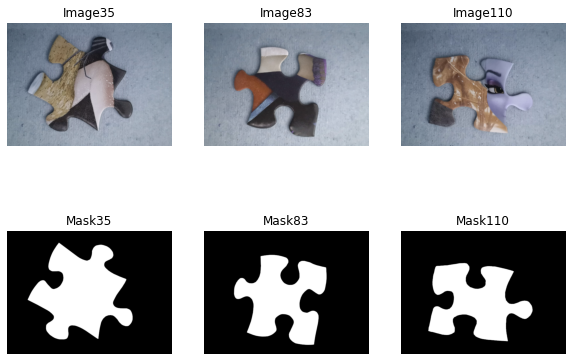

In [5]:
# code for displaying multiple images in one figure

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 3

# reading images
Image35 = cv2.imread('image-35.jpg')
Image83 = cv2.imread('image-83.jpg')
Image110 = cv2.imread('image-110.jpg')
Mask35 = cv2.imread('mask-35.png')
Mask83 = cv2.imread('mask-83.png')
Mask110 = cv2.imread('mask-110.png')

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image35)
plt.axis('off')
plt.title("Image35")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image83)
plt.axis('off')
plt.title("Image83")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image110)
plt.axis('off')
plt.title("Image110")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Mask35)
plt.axis('off')
plt.title("Mask35")


# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(Mask83)
plt.axis('off')
plt.title("Mask83")

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)

# showing image
plt.imshow(Mask110)
plt.axis('off')
plt.title("Mask110")

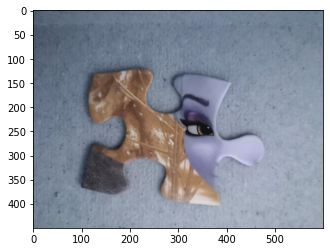

In [6]:
 plt.imshow(np.moveaxis(Image110, 1, 1))

In [7]:
im = Image110/255.0
print(im.shape) 


(450, 600, 3)


## RGB to Grayscale ##

Text(0.5, 1.0, 'Grayscale - Image-83')

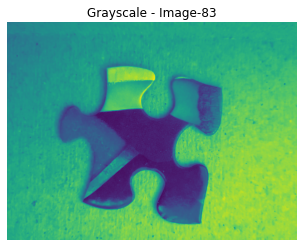

In [8]:
from skimage.color import rgb2gray
# showing image
grayscale83 = rgb2gray(Image83)
plt.imshow(grayscale83)
plt.axis('off')
plt.title("Grayscale - Image-83")


HSV

Text(0.5, 1.0, 'HSV - Image83')

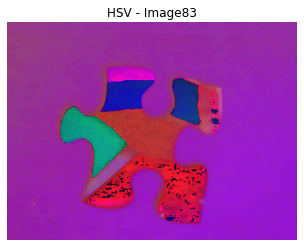

In [9]:
from skimage.color import rgb2hsv

hsv83 = rgb2hsv(Image83)
plt.imshow(hsv83)
plt.axis('off')
plt.title("HSV - Image83")

## 4 Descriptive Statistics ##


In [10]:
# To get height and width of an image - PIL library is used.
image = PIL.Image.open("image-83.jpg")

# image.size return a tuple containing the width and height in pixels.
width, height = image.size

### 4.1 What is the width of the image? ###

In [11]:
print("Width of image-83 is: ", width)

Width of image-83 is:  600


### 4.2 What is the height of the image? ###


In [12]:
print("Height of image-83 : ", height)

Height of image-83 :  450


### 4.3 How many pixels are in the image in total? ###

In [13]:
print ( "Total pixels on image-83 :", width * height)

Total pixels on image-83 : 270000


### 4.4 How many black pixels are there in the mask? ###

In [29]:
# reading the image data from desired directory
# https://www.geeksforgeeks.org/opencv-counting-the-number-of-black-and-white-pixels-in-the-image/
  
# counting the number of pixels
#number_of_white_pix = np.sum(Image35 == 255)
number_of_black_pix = np.sum(Mask83 == 0)
  
#print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels on Mask83 :', number_of_black_pix)

Number of black pixels on Mask83 : 627189


### 4.5 How many white pixels are there in the mask? ###


In [15]:
# counting the number of pixels
number_of_white_pix = np.sum(Mask83 == 255)

print('Number of white pixels on Mask83 :', number_of_white_pix)

Number of white pixels on Mask83 : 176847


### Using the grayscale version of the image... ###


In [16]:
#Convert Image-110.png to Grayscale
gray110 = cv2.cvtColor(Image110, cv2.COLOR_BGR2GRAY)

# or PIL
#gray110 = Image.open('image-110.png').convert('L')

### 4.6 What is the minimum pixel value in the image ###

In [17]:
#Find the smallest pix
smallest = gray110.min(axis=(0, 1))
print ("Minimum pixel for Image110 :", smallest)

Minimum pixel for Image110 : 14


### 4.7 What is the maximum pixel value in the image ###

In [18]:
#Find the largest pix
largest = gray110.max(axis=(0, 1))
print ("Maximum pixel for Image110 :", largest)



Maximum pixel for Image110 : 218


### 4.8 ###

In [19]:
puzzle_min = np.round(np.min(gray110[smallest]), 2)
puzzle_max = np.round(np.max(gray110), 2)
print ("min pixel value" , puzzle_min, " and max pixel value ", puzzle_max)


min pixel value 88  and max pixel value  218


### 4.9 ###

In [22]:
# Convert the mask to grayscale
grayMask110 = cv2.cvtColor(Mask110, cv2.COLOR_BGR2GRAY)

In [23]:
#Find mask largest pixel
bg_pix = grayMask110.max(axis=(0, 1))

In [25]:
bg_min = np.round(np.min(grayMask110[bg_pix]), 2)
bg_max = np.round(np.max(bg_pix), 2)
print ("Mask110 as background - min pixel value" , bg_min, " and max pixel value ", bg_max)

Mask110 as background - min pixel value 0  and max pixel value  255


### 4.10 What is the mean pixel intensity in the image ###

In [26]:
#Find the largest pix
gray110_mean = gray110.mean()
print ("Mean for Image110 :", gray110_mean)

Mean for Image110 : 137.76364444444445


### 4.11 ###

### 4.12 ###

### 4.13 ###

### 4.14 ###

### Confirm image type ###

In [30]:
from PIL import Image

with Image.open("image-110.jpg") as image110:
    print(image110.getbands())  # Returns ('R', 'G', 'B')

('R', 'G', 'B')


### 4.15 ###

### 4.16 ###

### 4.17 ###

### 4.18 ###

### 4.19 ###

### 4.20 ###

### Using the seaborn library... ###

Links

http://justinbois.github.io/bootcamp/2015/lessons/l34_intro_to_image_processing.html


https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/

http://emapr.ceoas.oregonstate.edu/pages/education/how_to/image_segmentation/how_to_spatial_segmentation.html


https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/

http://justinbois.github.io/bootcamp/2015/lessons/l34_intro_to_image_processing.html


https://glowingpython.blogspot.com/2012/08/kernel-density-estimation-with-scipy.html




In [ ]:
# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

# Set JB's favorite Seaborn settings
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18, 
    'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)

import skimage.io

### 4.15 ###


In [ ]:
# Load image
im_35 = skimage.io.imread('image-35.jpg')

# Display the image
with sns.axes_style('dark'):
    skimage.io.imshow(im_35 / im_35.max())

In [ ]:
# Get the histogram data
hist_phase, bins_phase = skimage.exposure.histogram(im_35)

# Use matplotlib to make a pretty plot of histogram data
plt.fill_between(bins_phase, hist_phase, alpha=0.5)

# Label axes
plt.xlabel('pixel value')
plt.ylabel('count')

### 5.2 Perform a histogram equalisation of the image  ###

In [ ]:
def histeq(im,nbr_bins=256):
  """  Histogram equalization of a grayscale image. """

  # get image histogram
  imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = 255 * cdf / cdf[-1] # normalize

  # use linear interpolation of cdf to find new pixel values
  im2 = interp(im.flatten(),bins[:-1],cdf)

  return im2.reshape(im.shape), cdf

In [ ]:
from PIL import Image
from numpy import *

im = array(Image.open('image-35.jpg').convert('L'), 'f')
im2,cdf = histeq(im)

### 4. ###

https://machinelearningmastery.com/discrete-probability-distributions-for-machine-learning/

# Convert an image into floating point #

In [ ]:
#from PIL import Image

#f_img35 = array(Image.open('image-35.jpg').convert('L'),'f')
#print (f_img35.shape, f_img35.dtype)

# 6 Background Classifier #

## 6.1 Image Convolution ##


In [ ]:
def convolve(image, kernel):
	# grab the spatial dimensions of the image, along with
	# the spatial dimensions of the kernel
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]

	# allocate memory for the output image, taking care to
	# "pad" the borders of the input image so the spatial
	# size (i.e., width and height) are not reduced
	pad = (kW - 1) // 2
	image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
		cv2.BORDER_REPLICATE)
	output = np.zeros((iH, iW), dtype="float32")
 